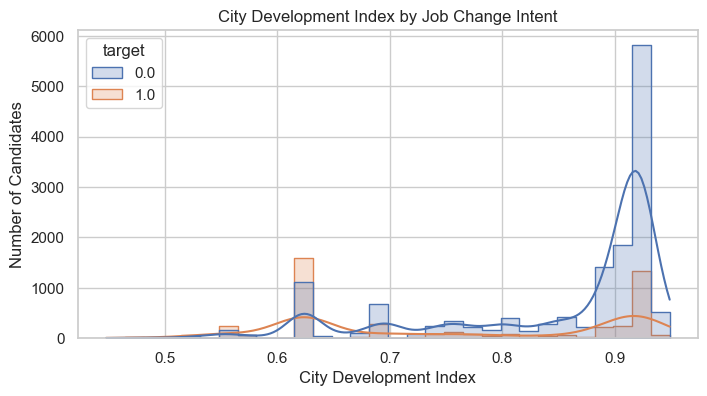

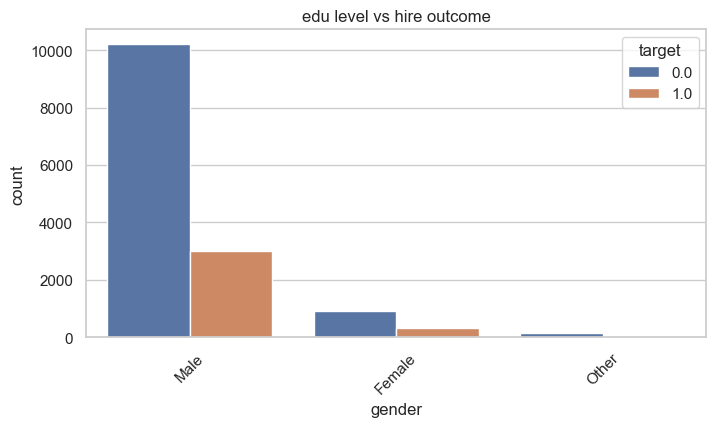

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


#load dataset
df = pd.read_csv("../data/aug_train.csv")

# sns.countplot(x='target', data=df)
# plt.title('distribution of target')
# plt.xlabel('hired?')
# plt.ylabel('Number of Candidates')
# plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='city_development_index', hue='target', bins=30, kde=True, element='step')
plt.title('City Development Index by Job Change Intent')
plt.xlabel('City Development Index')
plt.ylabel('Number of Candidates')
# plt.legend(title='Looking to Change Jobs')
plt.show()


plt.figure(figsize=(8,4))
sns.countplot(x='gender', hue='target', data=df)
plt.title('edu level vs hire outcome')
plt.xticks(rotation=45)
plt.show()

df.head()





In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
selected_cols = [
    'city_development_index',
    'relevent_experience',
    'enrolled_university',
    'education_level',
    'major_discipline',
    'experience',
    'company_size',
    'company_type',
    'last_new_job',
    'training_hours',
    'target'
]

df_selected = df[selected_cols]

#check for missing values
df_selected.isnull().sum()

city_development_index       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
fill_unknown = [
    'company_size', 
    'company_type', 
    'major_discipline',
    'education_level',
    'enrolled_university',
    'last_new_job',
]

for col in fill_unknown:
    df_selected[col] = df_selected[col].fillna('Unknown')

C:\Users\mudit\AppData\Local\Temp\ipykernel_2364\3812710824.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = df_selected[col].fillna('Unknown')


In [7]:
exp_values = {
    '<1': 0,
    '1': 1,  '2': 2,  '3': 3,  '4': 4,  '5': 5,
    '6': 6,  '7': 7,  '8': 8,  '9': 9,  '10': 10,
    '11': 11,'12': 12,'13': 13,'14': 14,'15': 15,
    '16': 16,'17': 17,'18': 18,'19': 19,'20': 20,
    '>20': 21
}

job_values = {
    'never': 0,
    '1': 1, '2': 2, '3': 3, '4': 4,
    '>4': 5
}


# Clean experience
df_selected['experience'] = df_selected['experience'].map(exp_values)
df_selected['experience'] = df_selected['experience'].fillna(df_selected['experience'].median())

# Clean last_new_job
df_selected['last_new_job'] = df_selected['last_new_job'].map(job_values)
df_selected['last_new_job'] = df_selected['last_new_job'].fillna(df_selected['last_new_job'].median())

# check data
# print(df_selected['experience'].unique())
# print(df_selected['last_new_job'].unique())



C:\Users\mudit\AppData\Local\Temp\ipykernel_2364\1573446488.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['experience'] = df_selected['experience'].map(exp_values)
C:\Users\mudit\AppData\Local\Temp\ipykernel_2364\1573446488.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['experience'] = df_selected['experience'].fillna(df_selected['experience'].median())
C:\Users\mudit\AppData\Local\Temp\ipykernel_2364\1573446488.py:22: SettingWithCopyWarning: 
A value is trying to be set

In [8]:
categorical_columns = [
    'relevent_experience',
    'enrolled_university',
    'education_level',
    'major_discipline',
    'company_size',
    'company_type'
]

df_encoded = pd.get_dummies(df_selected, columns=categorical_columns, drop_first=True)

print("Shape Before encoding", df_selected.shape)
print("Shape Before encoding", df_encoded.shape)
df_encoded.head()

df_encoded = df_encoded.astype(int)

df_encoded.head()


Shape Before encoding (19158, 11)
Shape Before encoding (19158, 34)


,city_development_index,experience,last_new_job,training_hours,target,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_Unknown,enrolled_university_no_enrollment,education_level_High School,...,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_Unknown,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown
0,0,21,1,36,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,15,5,47,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,5,0,83,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,52,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,21,4,8,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

#seperate features (x) and tagret (y)
x = df_encoded.drop('target', axis=1)
y = df_encoded['target']

#split into 80% to train and 20% to test

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)



In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# only scale the numerical columns
num_cols = ['city_development_index', 'experience', 'last_new_job', 'training_hours']


X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Scaled sample:")
print(X_train[num_cols].head())



Train shape: (15326, 33)
Test shape: (3832, 33)
Scaled sample:
       city_development_index  experience  last_new_job  training_hours
17855                     0.0   -0.018155     -0.589366        0.411648
17664                     0.0   -0.755421     -1.189700       -0.839076
13404                     0.0    0.276751      1.811969       -0.488873
13366                     0.0   -0.755421     -0.589366       -0.205376
15670                     0.0   -0.755421     -0.589366        1.545638


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict (X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.7617432150313153
F1 Score: 0.3321141185076811

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2877
           1       0.55      0.24      0.33       955

    accuracy                           0.76      3832
   macro avg       0.67      0.59      0.59      3832
weighted avg       0.73      0.76      0.72      3832

Accuracy: 0.7617432150313153
F1 Score: 0.3321141185076811

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2877
           1       0.55      0.24      0.33       955

    accuracy                           0.76      3832
   macro avg       0.67      0.59      0.59      3832
weighted avg       0.73      0.76      0.72      3832



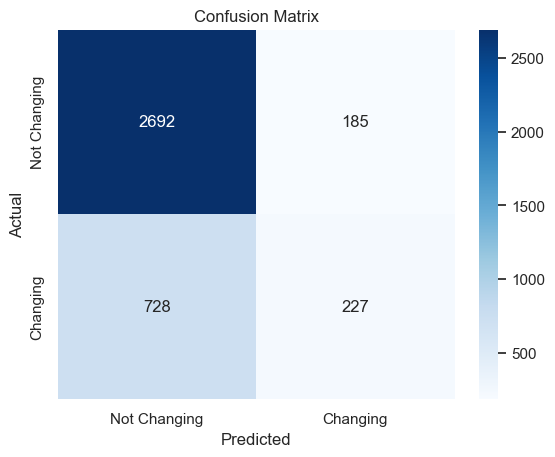

In [12]:

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Changing", "Changing"], yticklabels=["Not Changing", "Changing"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Random Forest Accuracy: 0.7322546972860126
Random Forest F1 Score: 0.3522727272727273

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2877
           1       0.44      0.29      0.35       955

    accuracy                           0.73      3832
   macro avg       0.62      0.59      0.59      3832
weighted avg       0.70      0.73      0.71      3832



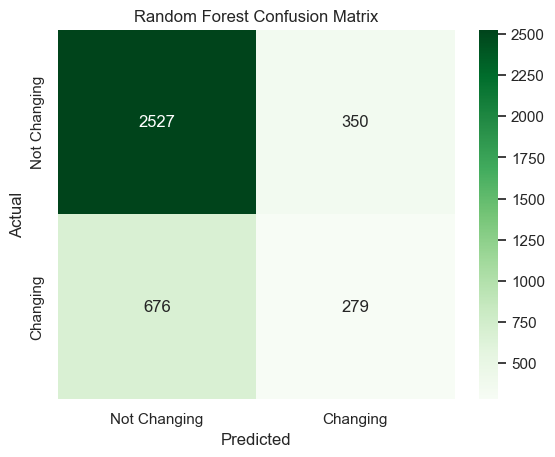

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

rf = RandomForestClassifier(
    n_estimators = 100,
    max_depth = None,
    random_state = 42,
    class_weight = 'balanced'
)

# Fit the model
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=["Not Changing", "Changing"], yticklabels=["Not Changing", "Changing"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




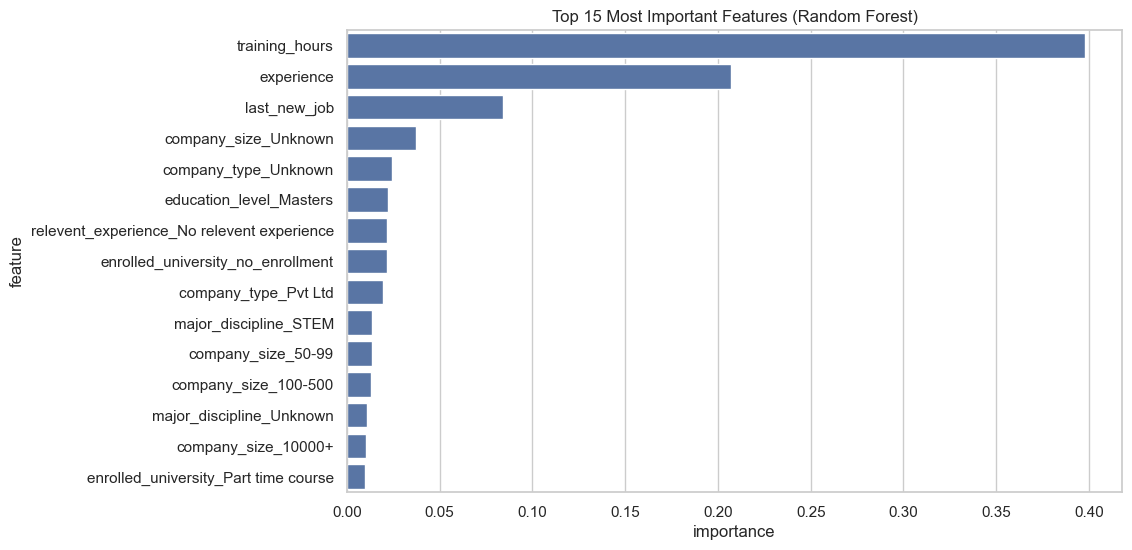

In [14]:
importances = rf.feature_importances_
features = X_train.columns

# Create a sorted bar plot
feature_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_df = feature_df.sort_values(by='importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_df.head(15))
plt.title("Top 15 Most Important Features (Random Forest)")
plt.show()


<>:15: SyntaxWarning: invalid escape sequence '\['
<>:16: SyntaxWarning: invalid escape sequence '\['
<>:15: SyntaxWarning: invalid escape sequence '\['
<>:16: SyntaxWarning: invalid escape sequence '\['
C:\Users\mudit\AppData\Local\Temp\ipykernel_2364\3576003456.py:15: SyntaxWarning: invalid escape sequence '\['
  X_train.columns = X_train.columns.str.replace('[<>\[\] ]', '_', regex=True)
C:\Users\mudit\AppData\Local\Temp\ipykernel_2364\3576003456.py:16: SyntaxWarning: invalid escape sequence '\['
  X_test.columns = X_test.columns.str.replace('[<>\[\] ]', '_', regex=True)
c:\Users\mudit\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:35:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.6758872651356994
XGBoost F1 Score: 0.5125588697017268

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      2877
           1       0.41      0.68      0.51       955

    accuracy                           0.68      3832
   macro avg       0.64      0.68      0.63      3832
weighted avg       0.75      0.68      0.70      3832



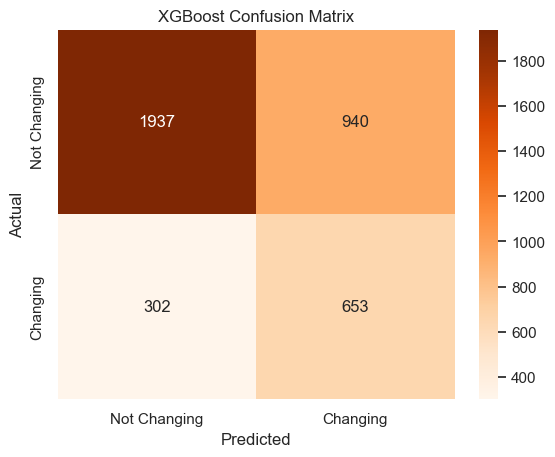

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

xgb = XGBClassifier(
    n_estimators = 100,
    max_depth = 5,
    learning_rate = 0.1,
    use_label_encoder = False,
    eval_metric = 'logloss',
    scale_pos_weight = 3.01,
    random_state = 42
)

# Replace or remove problematic characters
X_train.columns = X_train.columns.str.replace('[<>\[\] ]', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[<>\[\] ]', '_', regex=True)


xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

# evaluate the model

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["Not Changing", "Changing"],
            yticklabels=["Not Changing", "Changing"])

plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [19]:
import json

# Extract one sample (first row) from X_test
sample = X_test.iloc[0]

# Convert to dictionary
sample_dict = sample.to_dict()

# Save to JSON file
with open("sample.json", "w") as f:
    json.dump(sample_dict, f, indent=4)

print("Sample saved to sample.json")


Sample saved to sample.json


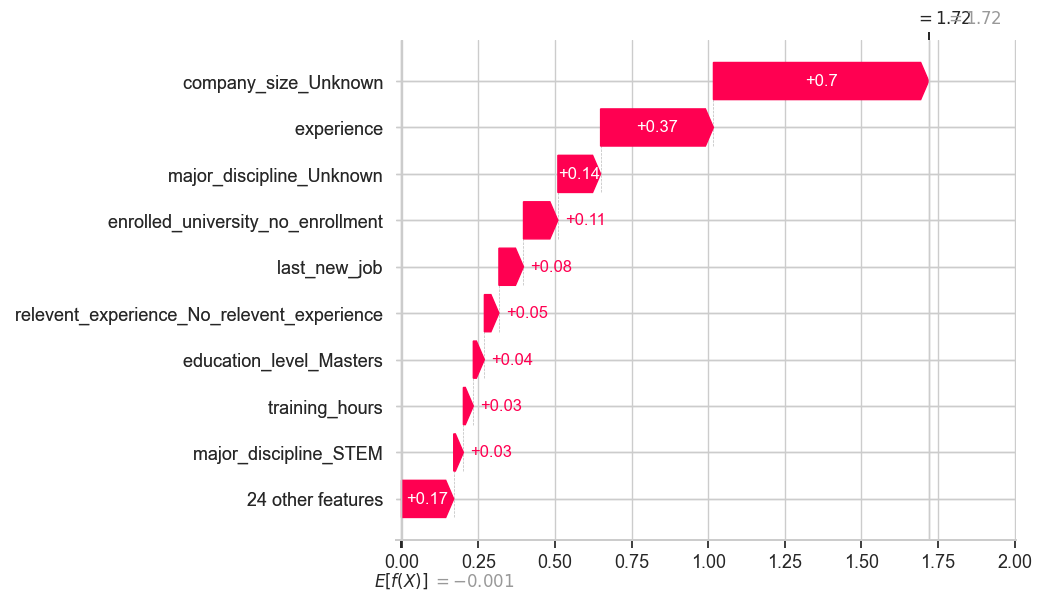

In [30]:
import shap

explainer = shap.Explainer(xgb)

# Choose an index of the test sample to explain
sample_index = 5

# Get SHAP values for the instance
shap_values = explainer(X_test)

shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[sample_index].values,
    X_test.iloc[sample_index]
)



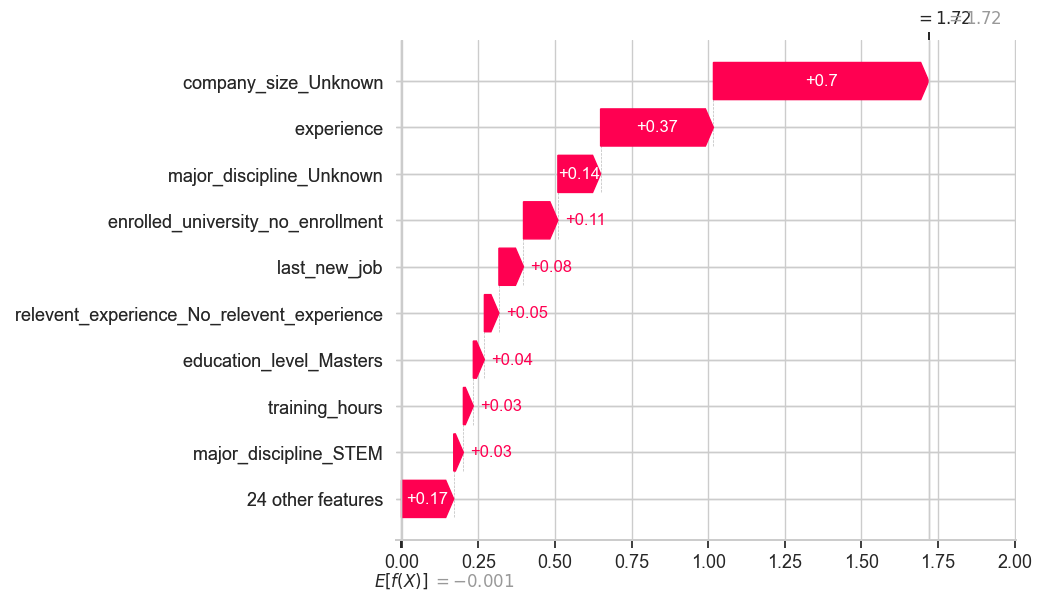

In [35]:
import matplotlib.pyplot as plt
import shap

# Generate the SHAP waterfall plot
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[sample_index].values,
    X_test.iloc[sample_index]
)

# display the plot
plt.show()

# save the plot
plt.savefig(
    "F:/Project - Talent peredictor/microsoft-azure-talent-predictor/shap/waterfall_summary.png",
    bbox_inches="tight"
)

# close the plot
plt.close(fig)


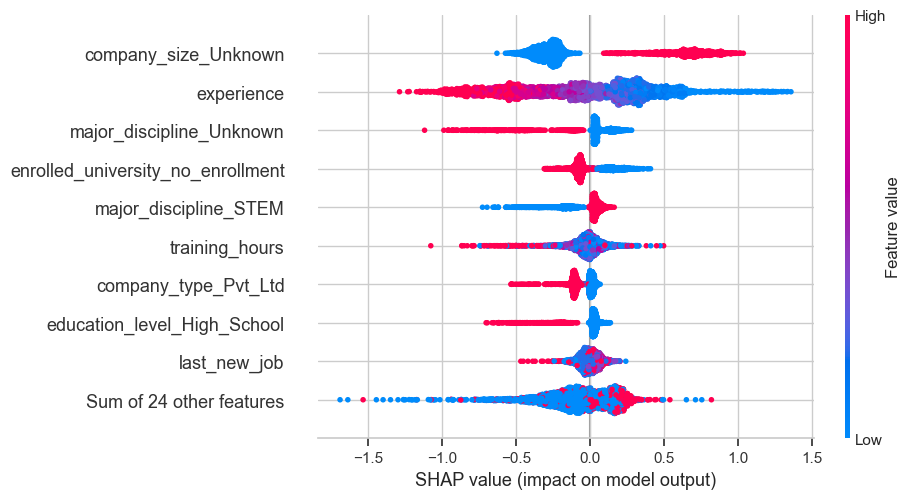

In [ ]:
import shap

# Use TreeExplainer for XGBoost
explainer = shap.Explainer(xgb)

shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)
